# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [12]:
"""
I chose to use player 1 total points won, as
it seems to be more associated with Federer amd different from player 2.

The coefs indicate the intercept or the points to be expected
from federer when playing.

it seems federer does best on Grass.
the P_values indicate theres isnt much significance 
but its not taking other factors into account.

Adding a constant term seems to bring the r2 value from the
current .768 to .028
the coefs also dont look the same, indoor hard becomes negative
and the p_values shift up some.

"""

'\nI chose to use player 1 total points won, as\nit seems to be more associated with Federer amd different from player 2.\n\nThe coefs indicate the intercept or the points to be expected\nfrom federer when playing.\n\nit seems federer does best on Grass.\nthe P_values indicate theres isnt much significance \nbut its not taking other factors into account.\n\nAdding a constant term seems to bring the r2 value from the\ncurrent .768 to .028\nthe coefs also dont look the same, indoor hard becomes negative\nand the p_values shift up some.\n\n'

In [13]:
df = pd.read_csv('/Users/kalebmckenzie/Documents/GitHub/m3-3-engineering-regression/data/tennis.csv')

fed_points = df['player1 total points won'].fillna(0)
surface = df['surface']

In [14]:
sm.OLS(
    fed_points,
        pd.get_dummies(surface, drop_first=True)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.768
Model:                                  OLS   Adj. R-squared (uncentered):              0.767
Method:                       Least Squares   F-statistic:                              778.1
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):                        0.00
Time:                              14:41:44   Log-Likelihood:                         -6051.0
No. Observations:                      1179   AIC:                                  1.211e+04
Df Residuals:                          1174   BIC:                                  1.214e+04
Df Model:                                 5                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Clay            0     16.771          0      1.000     -32.904      32.904
Indoor: Hard      66.1681      2.733     24.215      0.000      60.807      71.529
Outdoor: Clay     76.4137      2.603     29.353      0.000      71.306      81.521
Outdoor: Grass    92.5571      3.472     26.659      0.000      85.745      99.369
Outdoor: Hard     77.8672      1.871     41.616      0.000      74.196      81.538
==============================================================================
Omnibus:                       17.762   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.610
Skew:                           0.044   Prob(JB):                     2.25e-07
Kurtosis:                       3.784   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [5]:
"""
Interpretng the coefs, it seems the higher up in class you were
had some role in determining whether you survived or not.
Based on this, I think survivability on the Titanic was in large part based
on whether you were a woman or child, and if you were in first or second class.

This relates to socio-economically because
based on the regression the higher up in class you were the more likely you were to survive.
I think this is accurate for what actually happend as well as what would happen in a 
real world situation now.

I think the predictive mearures taken in the regression below
offers a pretty accurate representation. Class is important as well as your gender.
Especially back then, im assuming that women and children of higher class were probably the first to get on the 
life boats. Then the men probably followed as some of the last, and if you were in 3rd class as a male your chances of survival
were pretty slim.


"""

'\nInterpretng the coefs, it seems the higher up in class you were\nhad some role in determining whether you survived or not.\nBased on this, I think survivability on the Titanic was in large part based\non whether you were a woman or child, and if you were in first or second class.\n\nThis relates to socio-economically because\nbased on the regression the higher up in class you were the more likely you were to survive.\nI think this is accurate for what actually happend as well as what would happen in a \nreal world situation now.\n\nI think the predictive mearures taken in the regression below\noffers a pretty accurate representation. Class is important as well as your gender.\nEspecially back then, im assuming that women and children of higher class were probably the first to get on the \nlife boats. Then the men probably followed as some of the last, and if you were in 3rd class as a male your chances of survival\nwere pretty slim.\n\n\n'

In [15]:
dft = sns.load_dataset('titanic')

dft['gender_class'] = dft.sex.astype(str) + '_' + dft['class'].astype(str)

0.39317914367906703


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               survived   R-squared (uncentered):                   0.369
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              103.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                    4.88e-86
Time:                        14:41:51   Log-Likelihood:                         -632.74
No. Observations:                 891   AIC:                                      1275.
Df Residuals:                     886   BIC:                                      1299.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
female_Second     0.9211      0.057     16.267      0.000       0.810       1.032
female_Third      0.5000      0.041     12.155      0.000       0.419       0.581
male_First        0.3689      0.045      8.253      0.000       0.281       0.457
male_Second       0.1574      0.047      3.314      0.001       0.064       0.251
male_Third        0.1354      0.026      5.111      0.000       0.083       0.187
==============================================================================
Omnibus:                      123.472   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.623
Skew:                           0.693   Prob(JB):                     4.68e-21
Kurtosis:                       2.227   Cond. No.                         2.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

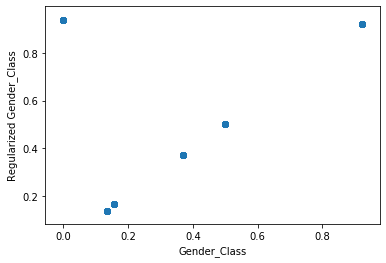

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import scipy



titanic_x = pd.get_dummies(dft['gender_class'], drop_first=True)
titanic_y = dft['survived']
logreg = LogisticRegression()


titanic_model1 = sm.OLS(titanic_y,titanic_x).fit(alpha = 0.5)
titanic_prediction1 = titanic_model1.predict(titanic_x)
clf = Ridge(alpha=1.0)
clf.fit(titanic_x, titanic_y)
y_prediction_regularized = clf.predict(titanic_x)
titanic_prediction_reg = titanic_model1.predict(titanic_x)
r2 = r2_score(titanic_y,y_prediction_regularized)
print(r2)


plt.scatter(titanic_prediction1, y_prediction_regularized)

plt.xlabel("Gender_Class")
plt.ylabel("Regularized Gender_Class")
titanic_model1.summary()

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [8]:
"""
I chose to use the number of bedrooms along with the size in sqaure feet of the garage.
This yielded a pretty high r-squared.
I used this model based on my own preferences when buying a house, along with some basic info
off of google.

Interpreting the coefs, for every extra bedroom you can expect an increase in
sales price of 2.136e+04
and for every extra square foot of garage space
you can expect a rise in sales price of 248.5070
"""

'\nI chose to use the number of bedrooms along with the size in sqaure feet of the garage.\nThis yielded a pretty high r-squared.\nI used this model based on my own preferences when buying a house, along with some basic info\noff of google.\n'

In [17]:
dfh = pd.read_csv("/Users/kalebmckenzie/Documents/GitHub/m3-3-engineering-regression/data/house_price.csv")


      BedroomAbvGr  GarageArea
0                3         548
1                3         460
2                3         608
3                3         642
4                4         836
...            ...         ...
1455             3         460
1456             3         500
1457             4         252
1458             2         240
1459             3         276

[1460 rows x 2 columns]
0.40500087394521067


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              6698.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:44:24   Log-Likelihood:                         -18180.
No. Observations:                1460   AIC:                                  3.636e+04
Df Residuals:                    1458   BIC:                                  3.638e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
BedroomAbvGr  2.136e+04   1162.933     18.371      0.000    1.91e+04    2.36e+04
GarageArea     248.5070      6.677     37.216      0.000     235.409     261.605
==============================================================================
Omnibus:                      462.994   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3789.074
Skew:                           1.242   Prob(JB):                         0.00
Kurtosis:                      10.491   Cond. No.                         372.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

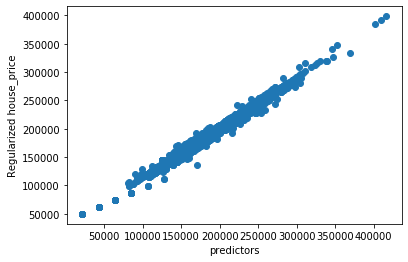

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import scipy



house_x = dfh[['BedroomAbvGr','GarageArea']]
print(house_x)
house_y = dfh['SalePrice']
logreg = LogisticRegression()


house_model1 = sm.OLS(house_y,house_x).fit(alpha = 0.5)
house_prediction1 = house_model1.predict(house_x)
clf = Ridge(alpha=1.0)
clf.fit(house_x, house_y)
y_pred_regularized = clf.predict(house_x)
house_prediction_reg = house_model1.predict(house_x)
r2 = r2_score(house_y,y_pred_regularized)
print(r2)


plt.scatter(house_prediction1, y_pred_regularized)

plt.xlabel("predictors")
plt.ylabel("Regularized house_price")
house_model1.summary()